This notebook aims to compare the effect of different color spaces on image classification. Here, 

* RGB
* LUV
* LAB
* HSV
* YUV
* YCrCb 
* HLS 

were compared. YCrCB, YUV, HSV came out on top. 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import zipfile
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(42) 
tf.config.experimental.enable_op_determinism()

## Load Data

In [2]:
# Replace the following with your secrets
os.environ['KAGGLE_USERNAME'] =  'oluwaseunilori'
os.environ['KAGGLE_KEY'] = 'xxxxxxxxxxxxxxxxxxxxxx'
import kaggle
!kaggle datasets download -d gpiosenka/butterfly-images40-species -p DATA_DIR

train_dir = "/content/train/"
test_dir ='/content/test'
val_dir = '/content/valid/'

 98% 359M/365M [00:15<00:00, 23.0MB/s]
100% 365M/365M [00:15<00:00, 24.8MB/s]


In [3]:
!unzip -q /content/DATA_DIR/butterfly-images40-species.zip

## RGB

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


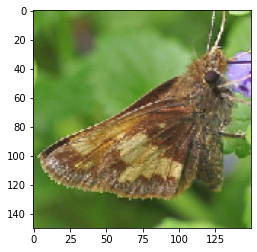

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)


plt.imshow(train_generator[1][0][0])

In [5]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax') 
])

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb_history = model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
rgb_test = model.evaluate(test_generator)
print(rgb_test)

Epoch 1/5
291/291 [==============================] - 46s 125ms/step - loss: 4.3383 - acc: 0.0140 - val_loss: 4.2647 - val_acc: 0.0267
Epoch 2/5
291/291 [==============================] - 36s 124ms/step - loss: 4.1967 - acc: 0.0326 - val_loss: 4.1611 - val_acc: 0.0507
Epoch 3/5
291/291 [==============================] - 36s 124ms/step - loss: 4.0622 - acc: 0.0553 - val_loss: 4.0595 - val_acc: 0.0640
Epoch 4/5
291/291 [==============================] - 36s 123ms/step - loss: 3.9405 - acc: 0.0715 - val_loss: 3.9564 - val_acc: 0.0693
Epoch 5/5
12/12 [==============================] - 1s 71ms/step - loss: 3.7816 - acc: 0.1013
[3.781573534011841, 0.10133333504199982]


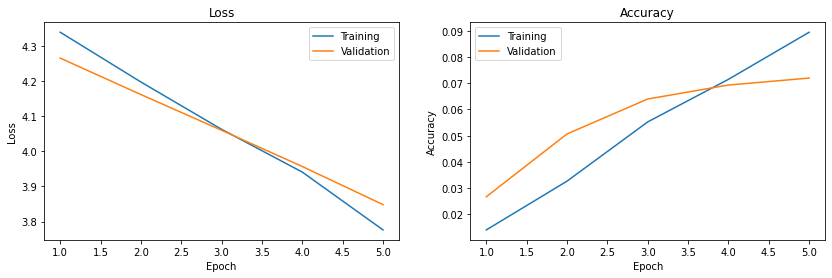

In [6]:
history = rgb_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 LUV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


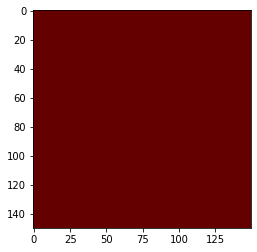

In [7]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
    return image

train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [8]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

rgb2luv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2luv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2luv_history = rgb2luv_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
luv_test = rgb2luv_model.evaluate(test_generator)
print(luv_test)

Epoch 1/5
291/291 [==============================] - 41s 140ms/step - loss: 4.3376 - acc: 0.0179 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 40s 138ms/step - loss: 4.3198 - acc: 0.0193 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 3/5
291/291 [==============================] - 39s 135ms/step - loss: 4.3184 - acc: 0.0188 - val_loss: 4.3172 - val_acc: 0.0133
Epoch 4/5
291/291 [==============================] - 39s 133ms/step - loss: 4.3178 - acc: 0.0168 - val_loss: 4.3141 - val_acc: 0.0187
Epoch 5/5
12/12 [==============================] - 1s 85ms/step - loss: 4.3143 - acc: 0.0133
[4.314274311065674, 0.013333333656191826]


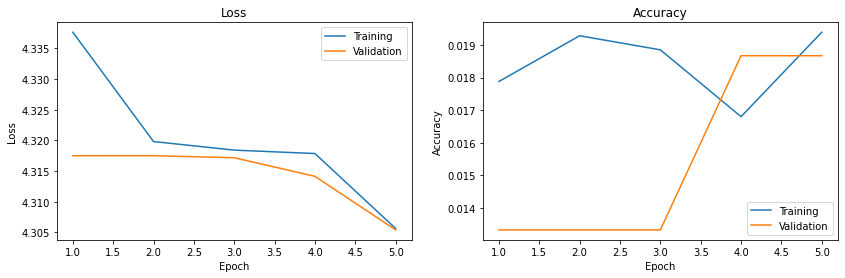

In [9]:
history = rgb2luv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 LAB

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


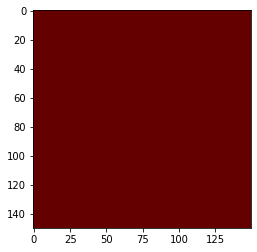

In [10]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    return image
train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)

validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [11]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

rgb2lab_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2lab_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2lab_history = rgb2lab_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
lab_test=rgb2lab_model.evaluate(test_generator)
print(lab_test)

Epoch 1/5
291/291 [==============================] - 44s 147ms/step - loss: 4.3332 - acc: 0.0194 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 41s 142ms/step - loss: 4.3219 - acc: 0.0186 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 3/5
291/291 [==============================] - 44s 152ms/step - loss: 4.3186 - acc: 0.0194 - val_loss: 4.3169 - val_acc: 0.0133
Epoch 4/5
291/291 [==============================] - 44s 151ms/step - loss: 4.3144 - acc: 0.0201 - val_loss: 4.3141 - val_acc: 0.0213
Epoch 5/5
12/12 [==============================] - 1s 83ms/step - loss: 4.2980 - acc: 0.0160
[4.29802131652832, 0.01600000075995922]


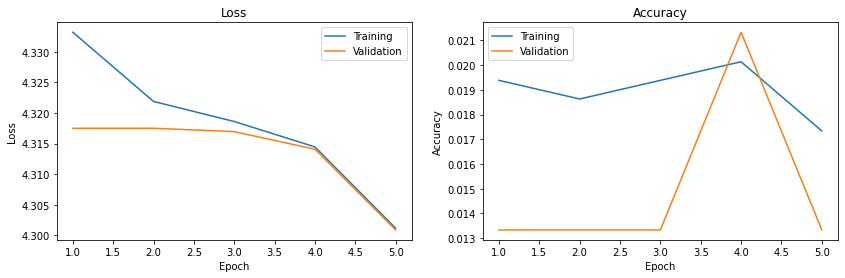

In [12]:
history = rgb2lab_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 HSV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


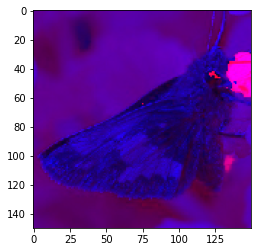

In [13]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return image
train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
plt.imshow(train_generator[1][0][0])

In [14]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
rgb2hsv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2hsv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2hsv_history = rgb2hsv_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
hsv_test = rgb2hsv_model.evaluate(test_generator)
print(hsv_test)

Epoch 1/5
291/291 [==============================] - 38s 128ms/step - loss: 4.3587 - acc: 0.0191 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 37s 126ms/step - loss: 4.3224 - acc: 0.0191 - val_loss: 4.3103 - val_acc: 0.0213
Epoch 3/5
291/291 [==============================] - 37s 127ms/step - loss: 4.2922 - acc: 0.0228 - val_loss: 4.2708 - val_acc: 0.0373
Epoch 4/5
291/291 [==============================] - 37s 126ms/step - loss: 4.1943 - acc: 0.0398 - val_loss: 4.1447 - val_acc: 0.0560
Epoch 5/5
12/12 [==============================] - 1s 75ms/step - loss: 3.9148 - acc: 0.1013
[3.914839744567871, 0.10133333504199982]


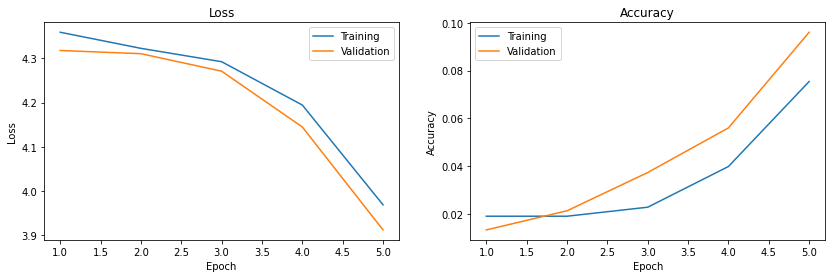

In [15]:
history = rgb2hsv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 YUV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


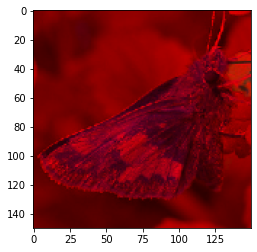

In [16]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    return image
train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
plt.imshow(train_generator[1][0][0])

In [17]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
rgb2yuv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2yuv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2yuv_history = rgb2yuv_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
yuv_test = rgb2yuv_model.evaluate(test_generator)
print(yuv_test)

Epoch 1/5
291/291 [==============================] - 37s 125ms/step - loss: 4.3282 - acc: 0.0124 - val_loss: 4.3832 - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 37s 126ms/step - loss: 4.2291 - acc: 0.0192 - val_loss: 4.1924 - val_acc: 0.0267
Epoch 3/5
291/291 [==============================] - 36s 125ms/step - loss: 4.1026 - acc: 0.0501 - val_loss: 4.0151 - val_acc: 0.0693
Epoch 4/5
291/291 [==============================] - 36s 124ms/step - loss: 3.8875 - acc: 0.0913 - val_loss: 3.8573 - val_acc: 0.1093
Epoch 5/5
12/12 [==============================] - 1s 108ms/step - loss: 3.6601 - acc: 0.1227
[3.6601243019104004, 0.12266666442155838]


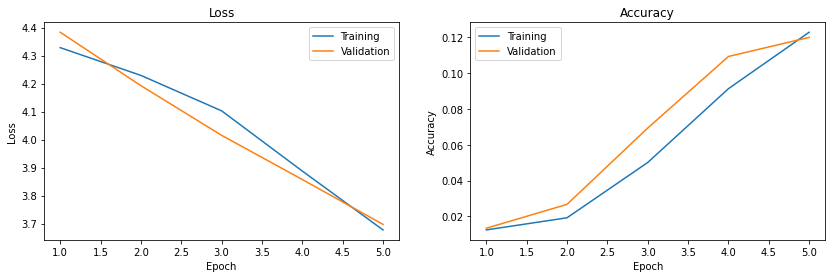

In [18]:
history = rgb2yuv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 YCrCb

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


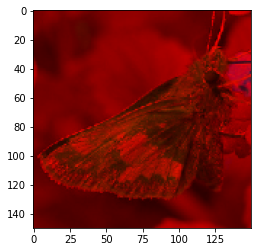

In [19]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    return image
train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [20]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
rgb2ycrcb_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2ycrcb_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2ycrcb_history = rgb2ycrcb_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
ycrcb_test = rgb2ycrcb_model.evaluate(test_generator)
print(ycrcb_test)

Epoch 1/5
291/291 [==============================] - 39s 130ms/step - loss: 4.2752 - acc: 0.0321 - val_loss: 4.1822 - val_acc: 0.0373
Epoch 2/5
291/291 [==============================] - 36s 125ms/step - loss: 4.0912 - acc: 0.0509 - val_loss: 4.0555 - val_acc: 0.0720
Epoch 3/5
291/291 [==============================] - 36s 122ms/step - loss: 3.9417 - acc: 0.0680 - val_loss: 3.9900 - val_acc: 0.0853
Epoch 4/5
291/291 [==============================] - 37s 125ms/step - loss: 3.7827 - acc: 0.0911 - val_loss: 3.7621 - val_acc: 0.1120
Epoch 5/5
12/12 [==============================] - 1s 77ms/step - loss: 3.6647 - acc: 0.1280
[3.6647493839263916, 0.12800000607967377]


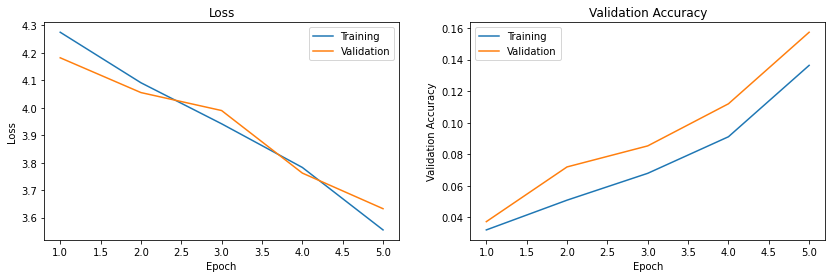

In [21]:
history = rgb2ycrcb_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Validation Accuracy'); plt.title('Validation Accuracy')
plt.legend()
plt.show()


## RGB 2 HLS

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


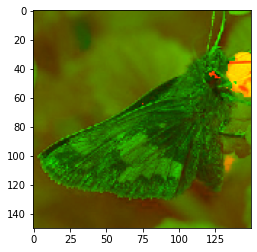

In [22]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    return image
train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [23]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
rgb2hls_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2hls_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2hls_history = rgb2hls_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
hls_test = rgb2hls_model.evaluate(test_generator)
print(hls_test)

Epoch 1/5
291/291 [==============================] - 37s 125ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 36s 125ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 3/5
291/291 [==============================] - 37s 126ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 4/5
291/291 [==============================] - 36s 123ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 5/5
12/12 [==============================] - 1s 78ms/step - loss: nan - acc: 0.0133
[nan, 0.013333333656191826]


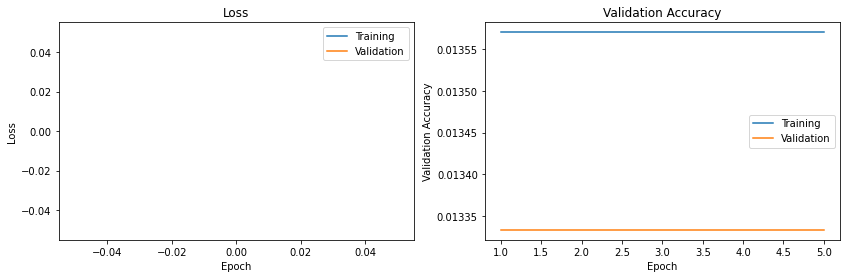

In [24]:
history = rgb2hls_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Validation Accuracy'); plt.title('Validation Accuracy')
plt.legend()
plt.show()

## Results

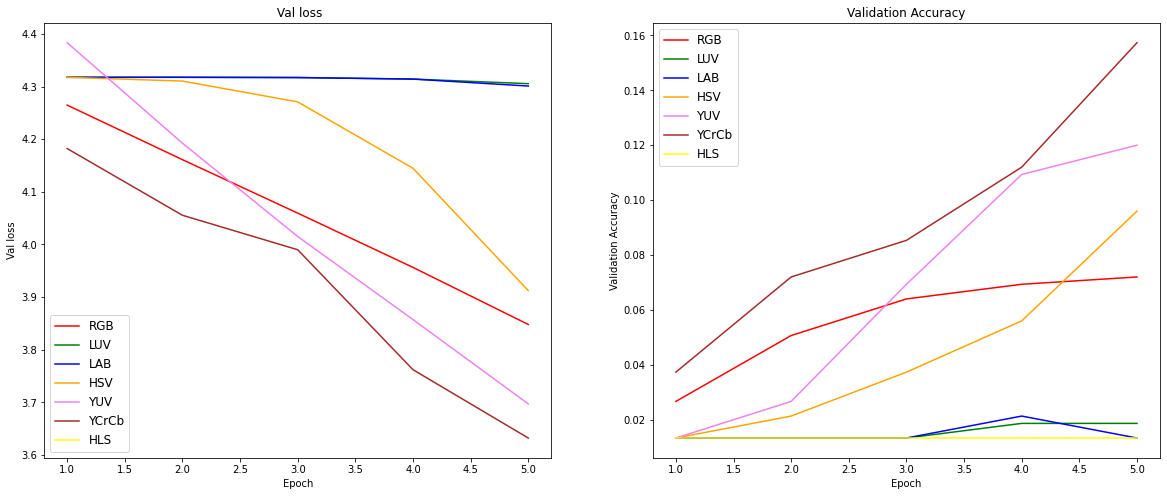

In [25]:
plot_rgb_history = rgb_history.history
plot_rgb2luv_history = rgb2luv_history.history
plot_rgb2lab_history = rgb2lab_history.history
plot_rgb2hsvhistory = rgb2hsv_history.history
plot_rgb2yuv_history = rgb2yuv_history.history
plot_rgb2ycrcb_history = rgb2ycrcb_history.history
plot_rgb2hls_history = rgb2hls_history.history

n_epochs = len(history['loss'])

plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1),plot_rgb_history['val_loss'], label='RGB',color='red')
plt.plot(range(1, n_epochs+1),plot_rgb2luv_history['val_loss'], label='LUV',color='Green')
plt.plot(range(1, n_epochs+1),plot_rgb2lab_history['val_loss'], label='LAB',color='blue')
plt.plot(range(1, n_epochs+1),plot_rgb2hsvhistory['val_loss'], label='HSV',color='orange')
plt.plot(range(1, n_epochs+1),plot_rgb2yuv_history['val_loss'], label='YUV',color='violet')
plt.plot(range(1, n_epochs+1),plot_rgb2ycrcb_history['val_loss'], label='YCrCb',color='brown')
plt.plot(range(1, n_epochs+1),plot_rgb2hls_history['val_loss'], label='HLS',color='yellow')
plt.xlabel('Epoch'); plt.ylabel('Val loss'); plt.title(' Val loss')
plt.legend(fontsize=12)
plt.subplot(1,2,2)



plt.plot(range(1, n_epochs+1),plot_rgb_history['val_acc'], label='RGB',color='Red')
plt.plot(range(1, n_epochs+1),plot_rgb2luv_history['val_acc'], label='LUV',color='Green')
plt.plot(range(1, n_epochs+1),plot_rgb2lab_history['val_acc'], label='LAB',color='Blue')
plt.plot(range(1, n_epochs+1),plot_rgb2hsvhistory['val_acc'], label='HSV',color='orange')
plt.plot(range(1, n_epochs+1),plot_rgb2yuv_history['val_acc'], label='YUV',color='violet')
plt.plot(range(1, n_epochs+1),plot_rgb2ycrcb_history['val_acc'], label='YCrCb',color='brown')
plt.plot(range(1, n_epochs+1),plot_rgb2hls_history['val_acc'], label='HLS',color='yellow')
plt.xlabel('Epoch'); plt.ylabel('Validation Accuracy'); plt.title('Validation Accuracy')
plt.legend(fontsize=12)
plt.show()
